<a href="https://colab.research.google.com/github/rdkdaniel/Social-Engineering/blob/main/Phishing_Detetion_Complete_borrowed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/github/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/blob/master/Phishing%20Website%20Detection_Models%20%26%20Training.ipynb

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data - uploaded from local disk
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


**Data Engagement:)**

In [3]:
data0.describe


<bound method NDFrame.describe of                           Domain  Have_IP  Have_At  URL_Length  URL_Depth  \
0               graphicriver.net        0        0           1          1   
1                      ecnavi.jp        0        0           1          1   
2                   hubpages.com        0        0           1          1   
3                extratorrent.cc        0        0           1          3   
4                  icicibank.com        0        0           1          3   
...                          ...      ...      ...         ...        ...   
9995     wvk12-my.sharepoint.com        0        0           1          5   
9996                 adplife.com        0        0           1          4   
9997           kurortnoye.com.ua        0        1           1          3   
9998  norcaltc-my.sharepoint.com        0        0           1          5   
9999       sieck-kuehlsysteme.de        0        1           1          4   

      Redirection  https_Domain  TinyURL 

In [4]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

**Data Visualization**

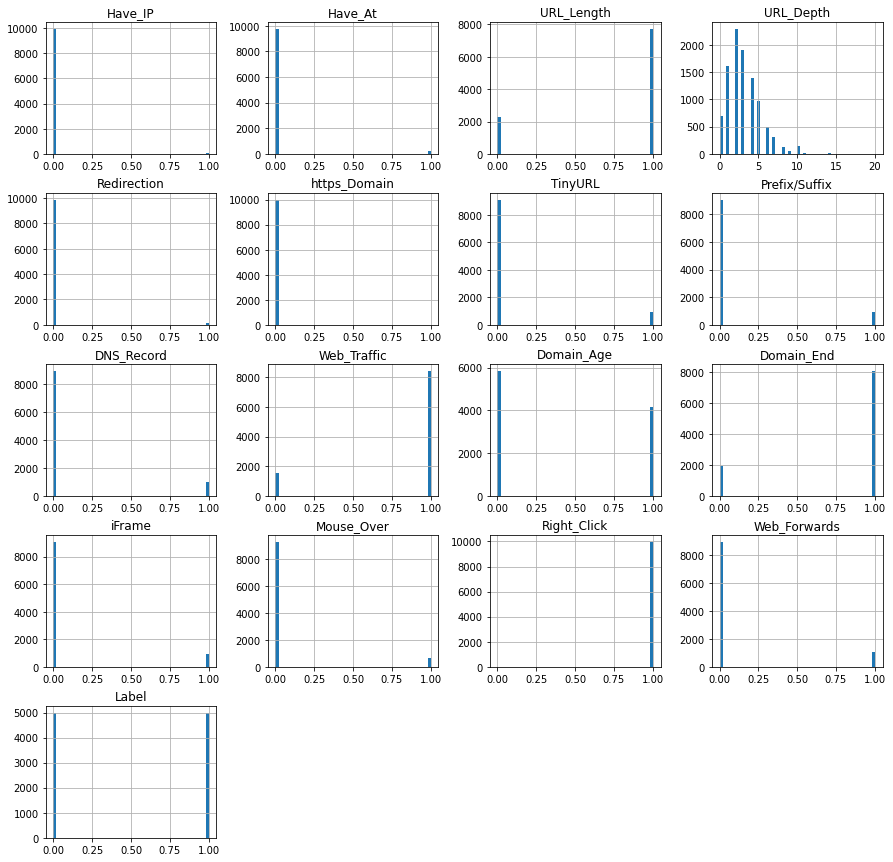

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

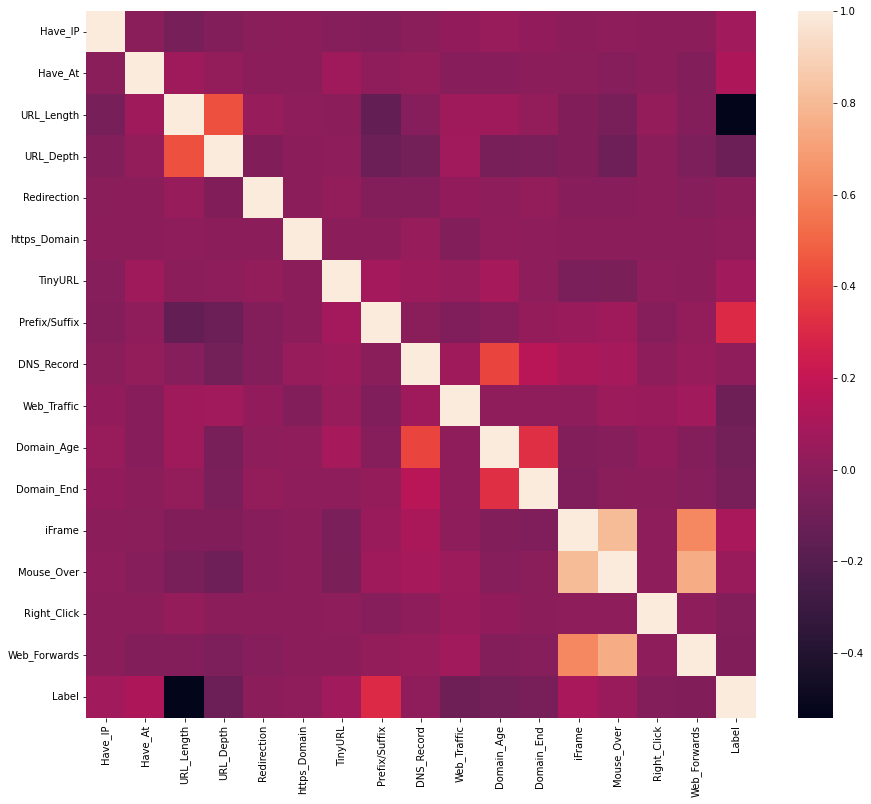

In [7]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

**Pre-processing Data**

In [8]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [10]:
#checking for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, author shuffles data. This even evades the case of overfitting while model training.


In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1
1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,1,0
3,0,0,1,2,0,0,0,1,0,1,0,1,1,1,1,1,1
4,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0


**Data Split**

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

**Machine Learning Models & Training**

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

**Decision Tree Classifie**r

In [16]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [18]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.814
Decision Tree: Accuracy on test Data: 0.804


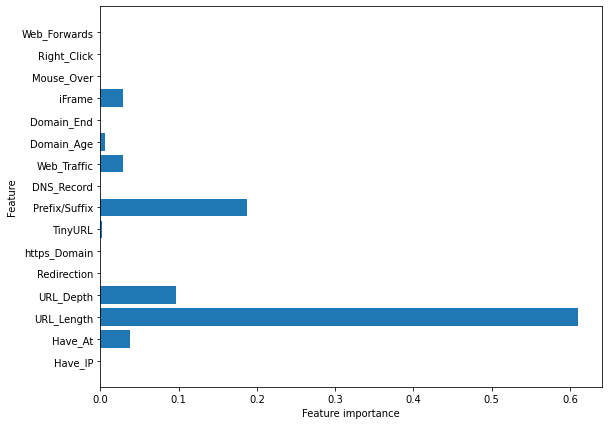

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Store Results**

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

**Random Forest**

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation**

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.819
Random forest: Accuracy on test Data: 0.815


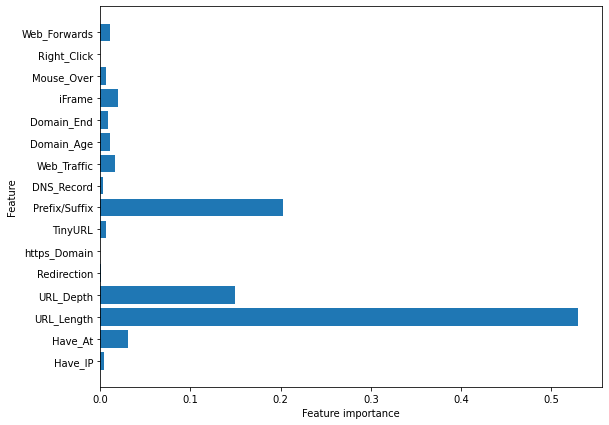

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Store Results**

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# **Try more classifiers later**

**More classifiers**

**XGBoost classifier**

In [26]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [27]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance evaluation**

In [28]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.869
XGBoost : Accuracy on test Data: 0.854


**Save results**

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

 **Autoencoder Neural Network**

In [30]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [31]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable par

In [32]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 2s 8ms/step - loss: 2.1197 - accuracy: 0.1513 - val_loss: -1.3412 - val_accuracy: 0.7912
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: -1.5502 - accuracy: 0.6981 - val_loss: -1.5289 - val_accuracy: 0.5706
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6163 - accuracy: 0.4141 - val_loss: -1.5775 - val_accuracy: 0.3350
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6467 - accuracy: 0.2241 - val_loss: -1.5980 - val_accuracy: 0.0388
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6660 - accuracy: 0.0178 - val_loss: -1.6138 - val_accuracy: 0.0019
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6744 - accuracy: 0.0014 - val_loss: -1.6277 - val_accuracy: 0.0019
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6951 - accuracy: 0.0044 - val_loss: -1.6359 - val_accuracy: 

**Performance evaluation**

In [33]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 3ms/step - loss: -1.7359 - accuracy: 0.0015

Autoencoder: Accuracy on training Data: 0.002
Autoencoder: Accuracy on test Data: 0.002


**Save results**

In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

**Classifier Comparison**

In [35]:
#creating dataframe to compare models with columns created showing their performance
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.814,0.804
1,Random Forest,0.819,0.814
2,XGBoost,0.869,0.854
3,AutoEncoder,0.002,0.002


In [36]:
#Sorting the datafram on accuracy
##Whats up with the Autoencoder??
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.869,0.854
1,Random Forest,0.819,0.814
0,Decision Tree,0.814,0.804
3,AutoEncoder,0.002,0.002


In [ ]:
#Save best model and load it later

In [37]:
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model**

In [38]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)